In [1]:
import json
import os
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

with open('Programming_languages.json', 'r') as file:
    programming_languages = json.load(file)['PROGRAMMING_LANGUAGES']

In [2]:
# programming_languages

from bs4 import BeautifulSoup
import re

def clean_text(text):
    # Remove HTML tags
    text = BeautifulSoup(text, 'html.parser').get_text()
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    return text

# cleaned_text = clean_text(text_data)

In [3]:
data_folder = '..\data'

text_data = []

for filename in os.listdir(data_folder):
    with open(os.path.join(data_folder, filename), 'r') as file:
        text_data.append(clean_text(file))

In [4]:
# text_data

In [5]:
# pip install nltk scikit-learn matplotlib wordcloud

In [6]:
# import nltk
# nltk.download('punkt')

In [7]:
# !python -m pip install --user --upgrade pip

In [8]:
# !pip cache purge
# !pip install spacy

In [9]:
# !python -m spacy download en_core_web_sm

In [13]:
import spacy

# Print the path to the spaCy models directory
print(spacy.about.__file__)

C:\Users\Checkout\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\about.py


In [15]:
import spacy
import os

# Get the directory containing the about.py file
about_dir = os.path.dirname(spacy.about.__file__)

# Specify the path to the en_core_web_sm model directory
model_path = os.path.join(about_dir, 'data', 'en_core_web_sm')

print(model_path)

C:\Users\Checkout\AppData\Local\Programs\Python\Python311\Lib\site-packages\spacy\data\en_core_web_sm


In [17]:
# import spacy

# # Load pre-trained spaCy model
# nlp = spacy.load('en_core_web_sm')

# def extract_entities(text):
#     doc = nlp(text)
#     entities = [(ent.text, ent.label_) for ent in doc.ents]
#     return entities

# # Example usage
# entities = extract_entities(text_data)

In [18]:
# entities

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

def extract_keywords(text_data):
    # Concatenate the strings in text_data into a single string
    concatenated_text = ' '.join(text_data)
    
    # Use TfidfVectorizer with custom stop words
    vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = vectorizer.fit_transform([concatenated_text])
    
    # Get feature names (words)
    feature_names = vectorizer.get_feature_names_out()
    
    # Identify keywords using TF-IDF scores
    tfidf_sum_per_word = tfidf_matrix.sum(axis=0).A1
    keywords = [feature_names[i] for i in tfidf_sum_per_word.argsort()[::-1][:10]]  # Extract top 10 keywords
    
    return keywords

# Example usage
keywords = extract_keywords(text_data)

['experience', 'work', 'team', 'data', 'business', 'including', 'skills', 'role', 'teams', 'status']


In [24]:
keywords

['experience',
 'work',
 'team',
 'data',
 'business',
 'including',
 'skills',
 'role',
 'teams',
 'status']

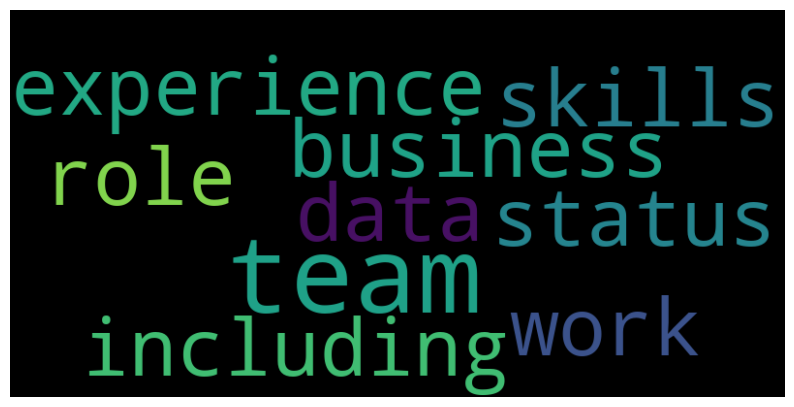

In [26]:
def visualize_keywords(keywords):
    wordcloud = WordCloud(width=800, height=400, max_font_size=110).generate(' '.join(keywords))
    plt.figure(figsize=(10, 7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

# Example usage
visualize_keywords(keywords)
